In [1]:
import sklearn
import pandas as pd
import spotipy
import matplotlib.pyplot as plt
import seaborn as sns
sp = spotipy.Spotify()
from spotipy.oauth2 import SpotifyClientCredentials
cid ="fd0d61f83f63494db11ef5f80c4448a4"
secret = "829d69e9109d4783b82b808ea03f9ee7"
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)
sp.trace=False

In [3]:
user_info = [{"user": "Zoe", "playlist_id": "37i9dQZF1Eje771Dj6R4Uy"}, {"user": "Mamta", "playlist_id": "37i9dQZF1Ejvvyo8JT8iW6"}, {"user": "Kelly", "playlist_id": "37i9dQZF1EjhjDiEazJ7Zw"}]

for user in user_info:
    playlist = sp.user_playlist(user["user"], user["playlist_id"])
    songs = playlist["tracks"]["items"]
    ids = []
    for i in range(len(songs)):
       ids.append(songs[i]["track"]["id"])
    features = sp.audio_features(ids)
    if user["user"] == "Zoe":
        df_Zoe = pd.DataFrame(features)
        df_Zoe["outcome"] = 1
        target_Zoe = df_Zoe["outcome"]
        info_Zoe = df_Zoe.describe()
        new_info_Zoe = info_Zoe.drop(["count", "std", "min", "25%", "50%", "75%", "max"],axis=0)
        new_info2_Zoe = new_info_Zoe.drop(["acousticness", "danceability", "duration_ms", "instrumentalness", "key", "liveness", "mode", "speechiness", "time_signature", "outcome"], axis=1)
        new_info2_Zoe["User"] = "Zoe"
    elif user["user"] == "Mamta":
        df_Mamta = pd.DataFrame(features)
        df_Mamta["outcome"] = 1
        target_Mamta = df_Mamta["outcome"]
        info_Mamta = df_Mamta.describe()
        new_info_Mamta = info_Mamta.drop(["count", "std", "min", "25%", "50%", "75%", "max"],axis=0)
        new_info2_Mamta = new_info_Mamta.drop(["acousticness", "danceability", "duration_ms", "instrumentalness", "key", "liveness", "mode", "speechiness", "time_signature", "outcome"], axis=1)
        new_info2_Mamta["User"] = "Mamta"
    else:
        df_Kelly = pd.DataFrame(features)
        df_Kelly["outcome"] = 1
        target_Kelly = df_Kelly["outcome"]
        info_Kelly = df_Kelly.describe()
        new_info_Kelly = info_Kelly.drop(["count", "std", "min", "25%", "50%", "75%", "max"],axis=0)
        new_info2_Kelly = new_info_Kelly.drop(["acousticness", "danceability", "duration_ms", "instrumentalness", "key", "liveness", "mode", "speechiness", "time_signature", "outcome"], axis=1)
        new_info2_Kelly["User"] = "Kelly"

    

In [4]:
# df_Zoe.head()
# df_Mamta.head()
# df_Kelly.head()
# target_Kelly.head()

frames = [new_info2_Zoe, new_info2_Mamta, new_info2_Kelly]

final_df = pd.concat(frames)

final_df.set_index("User")

final_df


,energy,loudness,tempo,valence,User
mean,0.557756,-9.00656,119.24430,0.497036,Zoe
mean,0.667667,-6.00965,120.92230,0.515339,Mamta
mean,0.665350,-6.83917,117.85288,0.453720,Kelly


In [5]:
info = df_Zoe.describe()
info

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,outcome
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.0
mean,0.385240,0.550450,236135.990000,0.557756,0.183705,5.030000,0.172352,-9.006560,0.750000,0.052962,119.244300,3.910000,0.497036,1.0
std,0.291186,0.153709,66537.877969,0.178999,0.284099,3.471253,0.140067,3.367094,0.435194,0.058921,27.878289,0.320826,0.209467,0.0
min,0.000238,0.135000,73898.000000,0.070700,0.000000,0.000000,0.027100,-20.935000,0.000000,0.024200,69.572000,3.000000,0.041000,1.0
25%,0.109750,0.457000,192378.250000,0.447750,0.000187,2.000000,0.099925,-10.558500,0.750000,0.030275,99.595000,4.000000,0.356000,1.0
50%,0.358500,0.572000,223455.500000,0.557500,0.005700,5.000000,0.118000,-8.395000,1.000000,0.034600,118.603000,4.000000,0.497500,1.0
75%,0.596250,0.657250,268961.000000,0.670500,0.308000,8.000000,0.205750,-6.581750,1.000000,0.045125,135.230500,4.000000,0.662250,1.0
max,0.985000,0.956000,413578.000000,0.962000,0.903000,11.000000,0.930000,-3.046000,1.000000,0.444000,188.965000,5.000000,0.960000,1.0


In [6]:
new_info = info.drop(["count", "std", "min", "25%", "50%", "75%", "max"],
                     axis=0)
new_info2 = new_info.drop(["acousticness", "danceability", "duration_ms", "instrumentalness", "key", "liveness", "mode", "speechiness", "time_signature", "outcome"], axis=1)
new_info2

,energy,loudness,tempo,valence
mean,0.557756,-9.00656,119.2443,0.497036


In [23]:
playlist_Spotify = sp.user_playlist("Spotify", "37i9dQZEVXbMDoHDwVN2tF")
songs_Spotify = playlist_Spotify["tracks"]["items"]
ids_Spotify = []
for i in range(len(songs_Spotify)):
   ids_Spotify.append(songs_Spotify[i]["track"]["id"])
features_Spotify = sp.audio_features(ids_Spotify)
df_Spotify = pd.DataFrame(features_Spotify)
df_Spotify.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
count,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,0.267102,0.721700,207610.56000,0.590360,0.004464,5.340000,0.167080,-6.607360,0.600000,0.128284,119.893060,3.940000,0.446680
std,0.233873,0.130545,42918.83498,0.173385,0.023489,3.611829,0.097771,2.727283,0.494872,0.103816,26.695707,0.239898,0.177541
min,0.005130,0.397000,129264.00000,0.104000,0.000000,0.000000,0.057200,-14.505000,0.000000,0.027400,74.972000,3.000000,0.111000
25%,0.070275,0.613250,180891.50000,0.475250,0.000000,1.250000,0.099500,-7.610500,0.000000,0.048200,97.307250,4.000000,0.338250
50%,0.192000,0.739000,205886.50000,0.586500,0.000000,6.000000,0.133000,-6.096500,1.000000,0.075800,117.056000,4.000000,0.414500
75%,0.387500,0.831250,225797.00000,0.724750,0.000008,8.000000,0.221250,-4.765500,1.000000,0.196750,139.380500,4.000000,0.558250
max,0.979000,0.906000,354320.00000,0.904000,0.162000,11.000000,0.552000,-2.652000,1.000000,0.384000,174.006000,4.000000,0.913000


C:\Users\knkay\anaconda\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
No handles with labels found to put in legend.


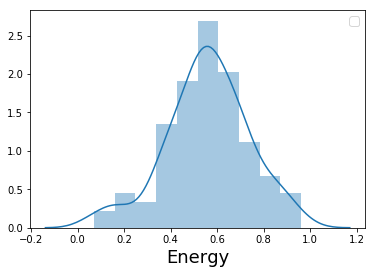

In [19]:
plt.plot()
sns.distplot(df_Zoe.energy)
plt.xlabel('Energy', fontsize=18)
plt.legend(fontsize=12)

# Incorporate the other graph properties
# plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
# plt.ylabel("Max Temperature (F)")
# plt.xlabel("Latitude")
# plt.grid(True)

# # Save the figure
plt.savefig("Energy_Zoe.png", bbox_inches='tight')

# Show plot
plt.show()

C:\Users\knkay\anaconda\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
No handles with labels found to put in legend.


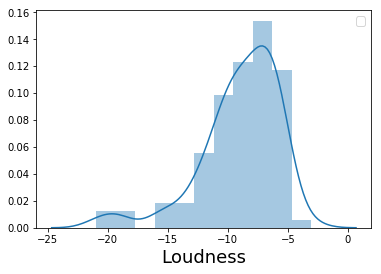

In [20]:
plt.subplot()
sns.distplot(df_Zoe.loudness)
plt.xlabel('Loudness', fontsize=18)
plt.legend(fontsize=12)

plt.savefig("Loudness_Zoe.png", bbox_inches='tight')

C:\Users\knkay\anaconda\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
No handles with labels found to put in legend.


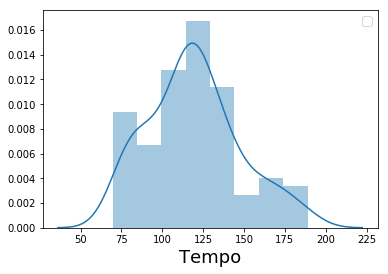

In [21]:
plt.subplot()
sns.distplot(df_Zoe.tempo)
plt.xlabel('Tempo', fontsize=18)
plt.legend(fontsize=12)

plt.savefig("Tempo_Zoe.png", bbox_inches='tight')

C:\Users\knkay\anaconda\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
No handles with labels found to put in legend.


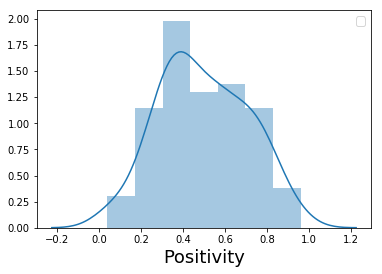

In [22]:
plt.plot()
sns.distplot(df_Zoe.valence)
plt.xlabel('Positivity', fontsize=18)
plt.legend(fontsize=12)

plt.savefig("Positivity_Zoe.png", bbox_inches='tight')

C:\Users\knkay\anaconda\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
No handles with labels found to put in legend.


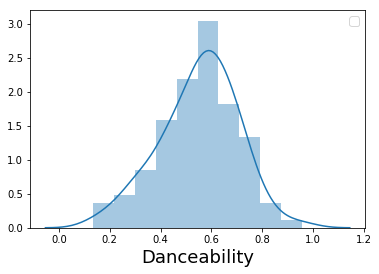

In [11]:
plt.subplot()
sns.distplot(df_Zoe.danceability)
plt.xlabel('Danceability', fontsize=18)
plt.legend(fontsize=12)

plt.savefig("Dance_Zoe.png")

In [12]:
from sklearn.model_selection import train_test_split
X_train_Zoe, X_test_Zoe, y_train_Zoe, y_test_Zoe = train_test_split(df_Zoe, target_Zoe, random_state=42)
X_train_Mamta, X_test_Mamta, y_train_Mamta, y_test_Mamta = train_test_split(df_Mamta, target_Mamta, random_state=42)
X_train_Kelly, X_test_Kelly, y_train_Kelly, y_test_Kelly = train_test_split(df_Kelly, target_Kelly, random_state=42)

ModuleNotFoundError: No module named 'sklearn'

In [4]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf_Zoe = rf.fit(X_train_Zoe, y_train_Zoe)
rf_Zoe.score(X_test_Zoe, y_test_Zoe)

ModuleNotFoundError: No module named 'sklearn'

In [5]:
importances = rf_Zoe.feature_importances_
importances

NameError: name 'rf' is not defined

In [6]:
sorted(zip(rf_Zoe.feature_importances_, feature_names), reverse=True)

NameError: name 'rf' is not defined